<a href="https://colab.research.google.com/github/Feiquanl/CS5100Project/blob/main/100BookReviewsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Read in data
df = pd.read_csv("Book_1_100.csv")
print(df.shape)
#df = df.head(500)
columns_to_check=["reviewText","summary"]
df = df.dropna(subset=columns_to_check)
print(df.shape)

(89635, 12)
(89571, 12)


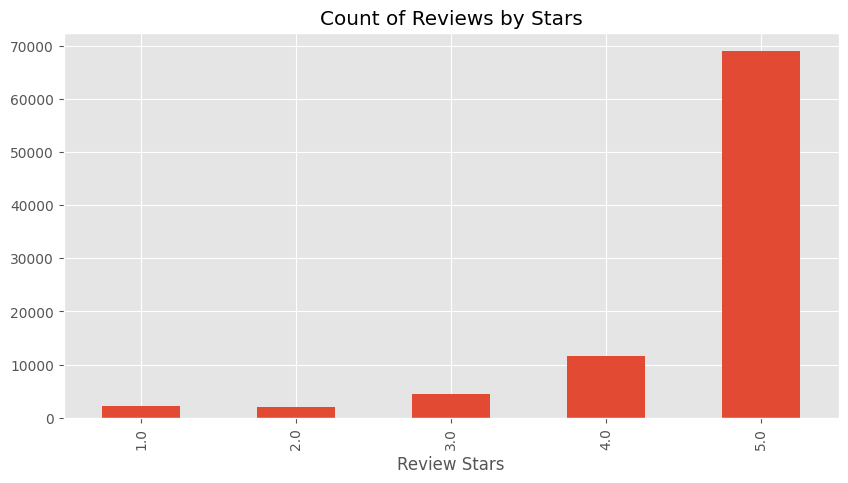

In [ ]:

# Now, count the occurrences of each unique value in the 'overall' column of the filtered DataFrame
# and then sort these counts based on the index, which in this case is the review rating value itself.
ax = df['overall'].value_counts().sort_index() \
    .plot(kind='bar',  # Plot the counts as a bar chart.
          title=f'Count of Reviews by Stars',  # Set the title of the plot, including the ASIN.
          figsize=(10, 5))  # Set the size of the plot to 10 inches wide by 5 inches tall.

# Set the label for the x-axis of the plot to 'Review Stars'.
ax.set_xlabel('Review Stars')

# Display the plot.
plt.show()

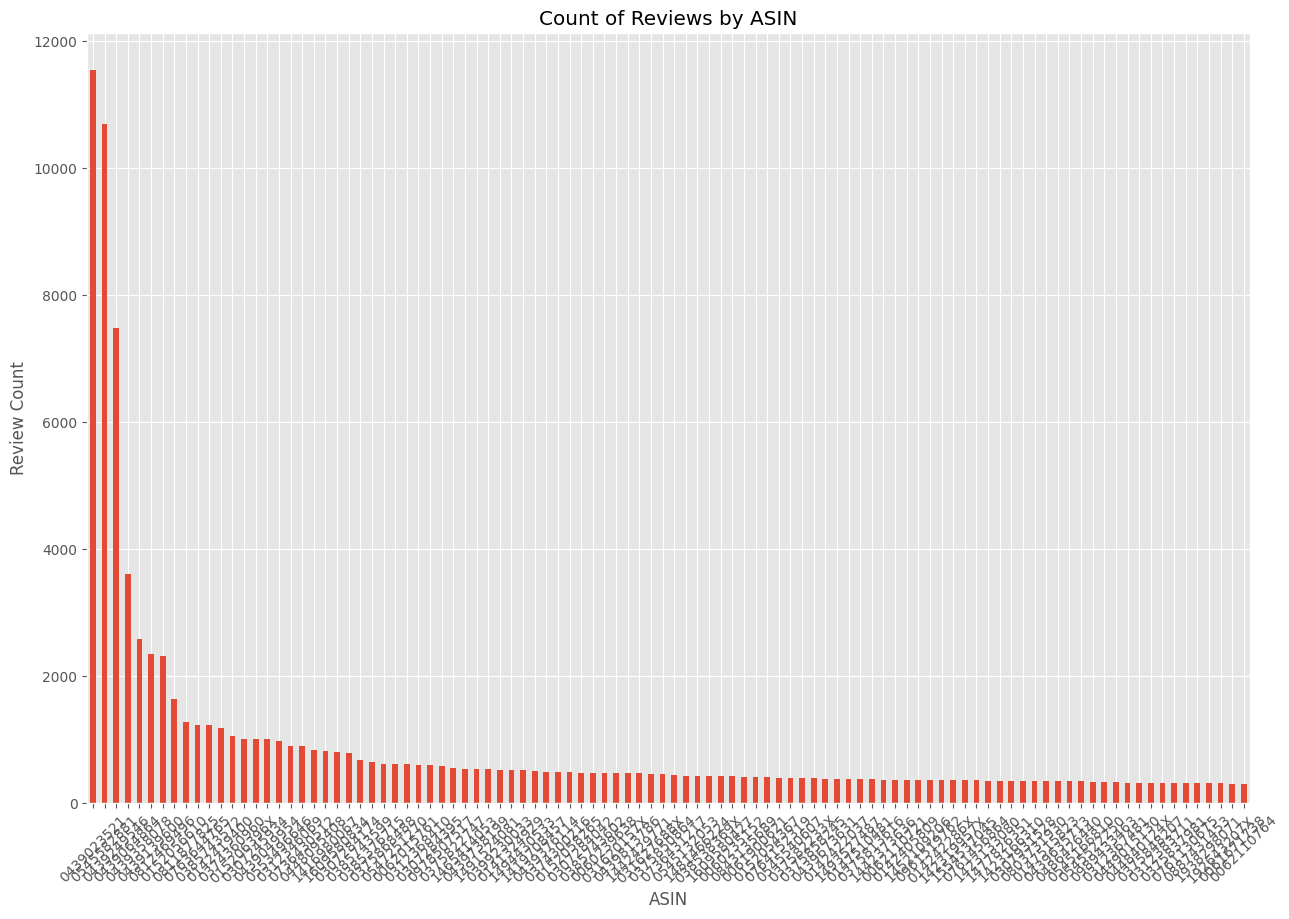

In [ ]:
# Group the DataFrame by 'asin' and count the reviews in each group
review_counts = df.groupby('asin')['overall'].count().sort_values(ascending=False)

# Plot the counts of reviews for each 'asin'
ax = review_counts.plot(kind='bar', title='Count of Reviews by ASIN', figsize=(15, 10))
ax.set_xlabel('ASIN')
ax.set_ylabel('Review Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels to make them readable
plt.show()

In [ ]:
#Extract one book to an new df and reset the index to start from 0
new_df=df.copy()
new_df = new_df.reset_index(drop=True)
# Reset the index and add the old index as a new column called 'ID'
# Add a new column to new_df and  start IDs from 1 instead of 0
new_df['Id'] = range(1, len(new_df) + 1)
print(new_df.head())
#print(new_df.shape)
example =new_df['reviewText'][50]
print(example)

   overall vote  verified   reviewTime      reviewerID        asin  \
0      5.0   29     False  06 15, 2000   AQGISDG8KML8W  0060239638   
1      5.0   43     False  06 15, 2000   AQGISDG8KML8W  0060239638   
2      5.0   74     False  06 15, 2000   AQGISDG8KML8W  0060239638   
3      5.0  NaN     False   06 3, 2000   AILQ1G3PB3249  0060239638   
4      5.0  NaN     False   05 3, 2000  A1QIQE5T1GBK7X  0060239638   

                       style     reviewerName  \
0  {'Format:': ' Paperback'}       Nana Annie   
1  {'Format:': ' Paperback'}       Nana Annie   
2  {'Format:': ' Paperback'}       Nana Annie   
3  {'Format:': ' Paperback'}  Amazon Customer   
4  {'Format:': ' Paperback'}               JP   

                                          reviewText  \
0  If you've read the first two books in the Frog...   
1  Frog and Toad have been around for years - I t...   
2  I've told my children that when yard sale time...   
3  Frog and Toad are best friends even though  th...   
4  T

In [ ]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Great', 'book', 'for', 'my', '6', 'year', 'old', '.', 'I', 'had']

In [ ]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Great', 'NNP'),
 ('book', 'NN'),
 ('for', 'IN'),
 ('my', 'PRP$'),
 ('6', 'CD'),
 ('year', 'NN'),
 ('old', 'JJ'),
 ('.', '.'),
 ('I', 'PRP'),
 ('had', 'VBD')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Great/NNP)
  book/NN
  for/IN
  my/PRP$
  6/CD
  year/NN
  old/JJ
  ./.
  I/PRP
  had/VBD
  bought/VBN
  the/DT
  hard/JJ
  copy/NN
  after/IN
  this/DT
  book/NN
  was/VBD
  read/VBN
  in/IN
  his/PRP$
  reading/NN
  class/NN
  ./.
  (GPE Great/NNP)
  stories/NNS
  and/CC
  very/RB
  entertaining/JJ
  ./.
  Even/RB
  for/IN
  adults/NNS
  ./.
  :/:
  )/))


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Run the polarity score on the 50 books
res = {}
for i, row in tqdm(new_df.iterrows(), total=len(new_df)):
    text = row['reviewText']
    id = row['Id']
    res[id] = sia.polarity_scores(text)
for idx, (key, value) in enumerate(res.items()):
    if idx < 3:  # Check to print only the first 3 items
        print(f"ID: {key}, Scores: {value}")

  0%|          | 0/89571 [00:00<?, ?it/s]

ID: 1, Scores: {'neg': 0.042, 'neu': 0.804, 'pos': 0.155, 'compound': 0.9824}
ID: 2, Scores: {'neg': 0.054, 'neu': 0.788, 'pos': 0.158, 'compound': 0.9943}
ID: 3, Scores: {'neg': 0.049, 'neu': 0.765, 'pos': 0.186, 'compound': 0.9955}


In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(new_df, how='left')
vaders.to_csv('vaders_reviews100.csv', index=False)

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,1,0.042,0.804,0.155,0.9824,5.0,29,False,"06 15, 2000",AQGISDG8KML8W,0060239638,{'Format:': ' Paperback'},Nana Annie,If you've read the first two books in the Frog...,"By now, you're hooked...",961027200,NaN
1,2,0.054,0.788,0.158,0.9943,5.0,43,False,"06 15, 2000",AQGISDG8KML8W,0060239638,{'Format:': ' Paperback'},Nana Annie,Frog and Toad have been around for years - I t...,Book Number Two in a Series of Four,961027200,NaN
2,3,0.049,0.765,0.186,0.9955,5.0,74,False,"06 15, 2000",AQGISDG8KML8W,0060239638,{'Format:': ' Paperback'},Nana Annie,I've told my children that when yard sale time...,Classics for Children,961027200,NaN
3,4,0.032,0.641,0.327,0.9771,5.0,NaN,False,"06 3, 2000",AILQ1G3PB3249,0060239638,{'Format:': ' Paperback'},Amazon Customer,Frog and Toad are best friends even though th...,Simply pleasing!,959990400,NaN
4,5,0.000,0.719,0.281,0.9916,5.0,NaN,False,"05 3, 2000",A1QIQE5T1GBK7X,0060239638,{'Format:': ' Paperback'},JP,"This is a wonderful collection of 5 stories, e...",Another Delightful Book from Arnold Lobel,957312000,NaN


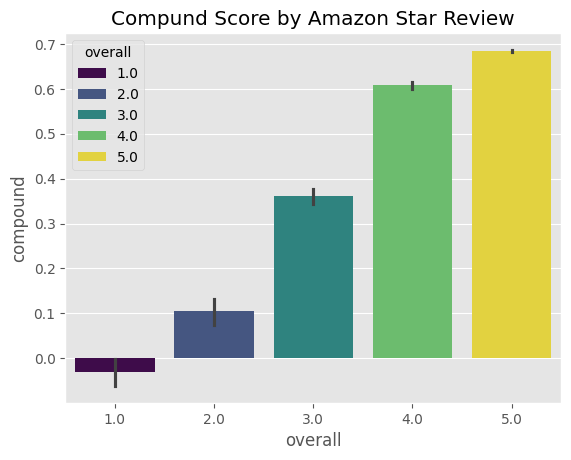

In [ ]:
ax = sns.barplot(data=vaders, x='overall',hue='overall', y='compound',palette='viridis')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

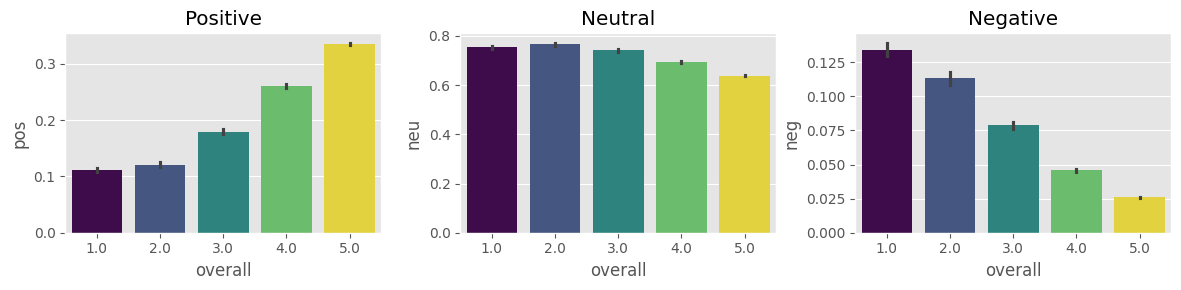

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='overall',hue='overall',y='pos', ax=axs[0],palette='viridis')
sns.barplot(data=vaders, x='overall',hue='overall', y='neu', ax=axs[1],palette='viridis')
sns.barplot(data=vaders, x='overall',hue='overall', y='neg', ax=axs[2],palette='viridis')
axs[0].set_title('Positive')
axs[0].get_legend().remove()
axs[1].set_title('Neutral')
axs[1].get_legend().remove()
axs[2].set_title('Negative')
axs[2].get_legend().remove()
plt.tight_layout()
plt.show()

# Filter out the unreasonable reviews

In [ ]:
# Define the thresholds
higher_threshold = 0.5  # Compound score above this value is considered high
lower_threshold = -0.5  # Compound score below this value is considered low
low_rating = 2  # Ratings at or below this are considered low
high_rating = 4  # Ratings at or above this are considered high

In [ ]:
# Filter out unreasonable reviews
# Case 1: Reviews with high positive sentiment but low Amazon rating
print(vaders.shape)
#print(vaders.head())

unreasonable_case1 = vaders[(vaders['compound'] > higher_threshold) & (vaders['overall'] <= low_rating)]
print(unreasonable_case1.shape)
# Case 2: Reviews with high negative sentiment but high Amazon rating
unreasonable_case2 = vaders[(vaders['compound'] < lower_threshold) & (vaders['overall'] >= high_rating)]
print(unreasonable_case2.shape)
# Combine both cases (note: this assumes you want to consider both types of "unreasonable" reviews)
unreasonable_reviews = pd.concat([unreasonable_case1, unreasonable_case2])

# Get the list of "ID" values for the unreasonable reviews
unreasonable_ids = unreasonable_reviews['Id'].values
print(unreasonable_ids)

#Ensure the unique "Id" is the DataFrame index
#if vaders.index.name != 'ID':
#    vaders.set_index('ID', inplace=True)

# To remove these unreasonable reviews from the original DataFrame by the 'ID' index
#reasonable_reviews = vaders.drop(unreasonable_reviews.index, inplace=True)

# Drop the rows from `vaders` where the "Id" matches the IDs in `unreasonable_ids`
reasonable_reviews = vaders[~vaders['Id'].isin(unreasonable_ids)]
print(reasonable_reviews.shape)
# Drop the rows from `vaders` where the "verified=false'
unreasonable_case3=vaders[vaders['verified'] == False]
print(unreasonable_case3.shape)
reasonable_reviews = vaders[vaders['verified'] == True]

print(reasonable_reviews.shape)
reasonable_reviews.to_csv('reasonable_reviews100.csv', index=False)
#print(reasonable_reviews.shape)

(89571, 17)
(1435, 17)
(1907, 17)
[   40   225   636 ... 89418 89492 89565]
(86229, 17)
(29012, 17)
(60559, 17)


In [ ]:
# Compute the average score grouped by ASIN
average_overall = reasonable_reviews.groupby('asin')['overall'].mean().reset_index()
average_compound = reasonable_reviews.groupby('asin')['compound'].mean().reset_index()
#print( average_overall)
print( average_compound)

          asin  compound
0   0060235152  0.655560
1   0060239638  0.696064
2   0061671738  0.720539
3   0061900621  0.694217
4   0062015761  0.679246
..         ...       ...
95  1554537045  0.638077
96  1609580427  0.621373
97  1609580834  0.662348
98  192643207X  0.817676
99  1938298071  0.692514

[100 rows x 2 columns]


In [ ]:
#Rank by the reasonable reviews
# Assign ranks in ascending order (which aligns with the descending order of compound)
average_compound['rank'] = average_compound['compound'].rank(method='min', ascending=False)
df_rank_processed=average_compound.copy()
df_rank_processed.to_csv('rank.csv', index=False)
print(df_rank_processed)

          asin  compound  rank
0   0060235152  0.655560  52.0
1   0060239638  0.696064  30.0
2   0061671738  0.720539  19.0
3   0061900621  0.694217  31.0
4   0062015761  0.679246  39.0
..         ...       ...   ...
95  1554537045  0.638077  64.0
96  1609580427  0.621373  71.0
97  1609580834  0.662348  47.0
98  192643207X  0.817676   1.0
99  1938298071  0.692514  32.0

[100 rows x 3 columns]


In [ ]:
# Read in data with original rank
df_rank = pd.read_excel("Book_rank_title.xlsx")
print(df_rank.shape)
print(df_rank.head())
print(df_rank["asin"])

(128, 6)
         asin  reviews_count  \
0  0385376715            644   
1  038538369X            429   
2  0375813616            377   
3  0374300216            485   
4  0887431453            312   

                                               title  \
0                   The Wonderful Things You Will Be   
1    P is for Potty! (Sesame Street) (Lift-the-Flap)   
2  Junie B. Jones's First Boxed Set Ever! (Books ...   
3                       If Animals Kissed Good Night   
4  School Zone - Big Preschool Workbook - Ages 4 ...   

                                            category  whole book rank  \
0  Books, Children's Books, Growing Up ; Facts of...               20   
1  Books, Children's Books, Growing Up ; Facts of...               49   
2  Books, Children's Books, Growing Up ; Facts of...               71   
3  Books, Children's Books, Growing Up ; Facts of...               80   
4  Books, Children's Books, Growing Up & Facts of...               94   

   rank_origin  
0    

# Combine and compare the original rank and reasonable review rank

In [ ]:
#If the 'asin' column's data type isn't object (which typically indicates a string in pandas), consider converting it:
df_rank['asin'] = df_rank['asin'].astype(str)
#Combine the original rank and reasonable review rank, and compare them
combined_rank_df = pd.merge(df_rank_processed, df_rank, on='asin', how='inner')
compare_rank_df = combined_rank_df[['asin', 'rank', 'rank_origin','title']]
sorted_compare_rank_df = compare_rank_df.sort_values(by='rank', ascending=True)
sorted_compare_rank_df.to_csv('sortedRankAfterProcessed.csv', index=False)
#print(compare_rank_df)
print(sorted_compare_rank_df)
print(sorted_compare_rank_df.shape)

          asin   rank  rank_origin  \
98  192643207X    1.0           96   
9   0142419400    2.0           55   
80  0989433463    3.0           83   
55  0439813786    4.0           37   
82  1419708457    5.0            6   
..         ...    ...          ...   
45  0439023521   96.0           28   
59  0486426440   97.0           61   
64  0545582881   98.0           74   
16  0152058265   99.0           93   
78  0961519762  100.0           44   

                                                title  
98  I Love to Keep My Room Clean (Bedtime stories ...  
9                            Anna and the French Kiss  
80                               I'll Follow the Moon  
55                       The Invention of Hugo Cabret  
82                             Rosie Revere, Engineer  
..                                                ...  
45                          The Hunger Games (Book 1)  
59   A Walk in the Woods (Dover Nature Coloring Book)  
64     Harry Potter and the Sorcerer's 

# recommand reviews and rank for specific asin

In [ ]:
# Copy the reasonable_reviews df to recommand reviews
df=reasonable_reviews.copy()
print(df.shape)


(60559, 17)


#Extract 10 reviews based on the targeted different range of compound score

In [ ]:
# List of target compound values
target_compounds = [-0.8, -0.4, 0, 0.4, 0.8]

results = []  # To store the results

for asin in df['asin'].unique():
    for target_compound in target_compounds:
        # Filter DataFrame for current ASIN and explicitly create a copy
        temp_df = df[df['asin'] == asin].copy()

        # Calculate absolute difference from target compound value
        temp_df['difference'] = (temp_df['compound'] - target_compound).abs()

        # Sort by difference and select top two
        nearest_reviews = temp_df.sort_values(by='difference').head(2)

        # Add target_compound and ASIN for clarity in the final DataFrame
        nearest_reviews['target_compound'] = target_compound
        nearest_reviews['asin'] = asin  # Reassigning ASIN in case it's lost during filtering

        # Append to results
        results.append(nearest_reviews)

# Concatenate all results into a single DataFrame
final_df = pd.concat(results, ignore_index=True)

# Optionally, drop the 'difference' column if it's no longer needed
final_df = final_df.drop(columns=['difference'])
combined_details = pd.merge(final_df, sorted_compare_rank_df[['asin', 'rank','title']], on='asin', how='left')

#final_df.to_csv('recommendedReviews10forOneAsin.csv', index=False)
combined_details.to_csv('10ReviewsRankforAsins.csv', index=False)
print(combined_details)
#print(final_df)

<ipython-input-44-225537c6f477>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_reviews['target_compound'] = target_compound
<ipython-input-44-225537c6f477>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_reviews['asin'] = asin  # Reassigning ASIN in case it's lost during filtering
<ipython-input-44-225537c6f477>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

        Id    neg    neu    pos  compound  overall vote  verified  \
0       54  0.109  0.797  0.094   -0.7640      5.0   10      True   
1      213  0.263  0.737  0.000   -0.6855      2.0  NaN      True   
2      262  0.126  0.805  0.069   -0.3729      2.0    3      True   
3      349  0.097  0.798  0.105   -0.4546      4.0   18      True   
4      174  0.000  1.000  0.000    0.0000      4.0  NaN      True   
..     ...    ...    ...    ...       ...      ...  ...       ...   
995  88873  0.000  1.000  0.000    0.0000      5.0  NaN      True   
996  89007  0.000  0.682  0.318    0.4199      5.0  NaN      True   
997  89017  0.000  0.682  0.318    0.4201      5.0  NaN      True   
998  89051  0.053  0.728  0.218    0.8004      5.0  NaN      True   
999  89075  0.081  0.743  0.176    0.7986      3.0   11      True   

      reviewTime      reviewerID        asin                           style  \
0    01 23, 2017  A3E5Z87YBD11NE  0060239638  {'Format:': ' Kindle Edition'}   
1    10 29,

In [ ]:
# Specify the ASIN you're interested in
specific_asin = '0061900621'
# Use query to filter reviews for the specific ASIN
specific_asin_details = final_df.query("asin == @specific_asin")[["asin",'reviewText',"overall","compound"]]
#print(specific_asin_details)
combined_asin_details = pd.merge(specific_asin_details,  sorted_compare_rank_df[['asin', 'rank','title']], on='asin', how='left')
combined_asin_details.to_csv('10ReviewsRankfor0061900621.csv', index=False)
print(combined_asin_details)

         asin                                         reviewText  overall  \
0  0061900621  There's another person who reviewed this item ...      3.0   
1  0061900621  I got this for my 6 year old niece, soon to be...      3.0   
2  0061900621  My niece had trouble with her elder daughter 3...      5.0   
3  0061900621  I got this for my 6 year old niece, soon to be...      3.0   
4  0061900621                                       as described      5.0   
5  0061900621   Decent read for kids who are about to get a baby      4.0   
6  0061900621  I gave this book to a two and a half year old ...      5.0   
7  0061900621  I got this for my granddaughter who is going t...      5.0   
8  0061900621      Great little book, generating fun discussion'      5.0   
9  0061900621  This book is great for preparing a child for t...      5.0   

   compound  rank             title  
0   -0.7535  31.0  I'm a Big Sister  
1   -0.4228  31.0  I'm a Big Sister  
2   -0.4019  31.0  I'm a Big Sister  


In [ ]:
# Specify the ASIN you're interested in
specific_asin = '1938298071'
# Use query to filter reviews for the specific ASIN
specific_asin_details = final_df.query("asin == @specific_asin")[["asin",'reviewText',"overall","compound"]]
#print(specific_asin_details)
combined_asin_details = pd.merge(specific_asin_details,  sorted_compare_rank_df[['asin', 'rank','title']], on='asin', how='left')

print(combined_asin_details)

         asin                                         reviewText  overall  \
0  1938298071  the message is good but it is sort of strange ...      3.0   
1  1938298071  I purchased this because it was highly acclaim...      1.0   
2  1938298071  She also just published, "What Do You Do With ...      5.0   
3  1938298071  As you read this book you can stop on every pa...      5.0   
4  1938298071                          A must-read for everyone.      5.0   
5  1938298071              Grandkid needed to hear this message!      5.0   
6  1938298071       Thank you fast shipping product as expected!      5.0   
7  1938298071            Highly recommend this book for all ages      5.0   
8  1938298071  This is a wonderful book for young children to...      5.0   
9  1938298071  Not sure why, but this is never the one my kid...      3.0   

   compound  rank                         title  
0   -0.8064  32.0  What Do You Do With an Idea?  
1   -0.7088  32.0  What Do You Do With an Idea?  
2 

# Extract 2 reviews around the average compound score

In [ ]:
# Assuming 'df' is your main DataFrame with the reviews and their compound scores
# Assuming 'df_rank_processed' contains ASINs with specific target compound scores

results = []  # To store the results

for asin in df['asin'].unique():
    # Assuming each ASIN has a unique compound value in df_rank_processed
    # If multiple, this takes the first one; adjust according to your data
    target_compound = df_rank_processed.query("asin == @asin")['compound'].iloc[0]

    temp_df = df[df['asin'] == asin].copy()

    # Calculate absolute difference from target compound value
    temp_df['difference'] = (temp_df['compound'] - target_compound).abs()

    # Sort by difference and select top two
    nearest_reviews = temp_df.sort_values(by='difference').head(2)

    # Add target_compound and ASIN for clarity in the final DataFrame
    nearest_reviews['target_compound'] = target_compound
    nearest_reviews['asin'] = asin  # Ensuring ASIN column is correct

    # Append to results
    results.append(nearest_reviews)

# Concatenate all results into a single DataFrame
final_df = pd.concat(results, ignore_index=True)

# Optionally, drop the 'difference' column if it's no longer needed
final_df = final_df.drop(columns=['difference'])
final_df.to_csv('2ReviewsRankforAsins.csv', index=False)
print(final_df)

        Id    neg    neu    pos  compound  overall vote  verified  \
0      225  0.000  0.723  0.277    0.6956      2.0    2      True   
1      115  0.000  0.594  0.406    0.6989      5.0  NaN      True   
2      502  0.000  0.477  0.523    0.6588      5.0  NaN      True   
3      614  0.000  0.185  0.815    0.6588      5.0  NaN      True   
4     1118  0.000  0.695  0.305    0.7203      5.0  NaN      True   
..     ...    ...    ...    ...       ...      ...  ...       ...   
195  87909  0.072  0.687  0.240    0.6607      5.0  NaN      True   
196  88781  0.000  0.737  0.263    0.8176      5.0  NaN      True   
197  88538  0.000  0.758  0.242    0.8225      5.0  NaN      True   
198  88880  0.000  0.458  0.542    0.6932      5.0  NaN      True   
199  89021  0.056  0.854  0.090    0.6953      5.0  NaN      True   

      reviewTime      reviewerID        asin                           style  \
0     09 4, 2014   AUUP48T642MV4  0060239638  {'Format:': ' Kindle Edition'}   
1    01 30,

In [ ]:
# Specify the ASIN you're interested in
specific_asin = '0061900621'
# Use query to filter reviews for the specific ASIN
specific_asin_details = final_df.query("asin == @specific_asin")[["asin",'reviewText',"overall","compound"]]
#print(specific_asin_details)
combined_asin_details = pd.merge(specific_asin_details,  sorted_compare_rank_df[['asin', 'rank','title']], on='asin', how='left')
combined_asin_details.to_csv('2ReviewsRankfor0061900621.csv', index=False)
print(combined_asin_details)

         asin                                         reviewText  overall  \
0  0061900621  Cute book, getting my daughter interested in b...      4.0   
1  0061900621  Bought it for my 2 1/2 year old, she liked the...      4.0   

   compound  rank             title  
0    0.6908  31.0  I'm a Big Sister  
1    0.6908  31.0  I'm a Big Sister  


In [ ]:
# Specify the ASIN you're interested in
specific_asin = '1938298071'
# Use query to filter reviews for the specific ASIN
specific_asin_details = final_df.query("asin == @specific_asin")[["asin",'reviewText',"overall","compound"]]
#print(specific_asin_details)
combined_asin_details = pd.merge(specific_asin_details,  sorted_compare_rank_df[['asin', 'rank','title']], on='asin', how='left')

print(combined_asin_details)

         asin                                         reviewText  overall  \
0  1938298071  I was enchanted by the illustrations and story...      4.0   
1  1938298071  I have been using this book with my research t...      5.0   

   compound  rank                         title  
0    0.7430  22.0  What Do You Do With an Idea?  
1    0.7351  22.0  What Do You Do With an Idea?  
